In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('cleanedDataset.csv', encoding = 'ISO-8859-1')

In [3]:
df.columns

Index(['type', 'days_for_shipping', 'days_for_shipment', 'benefit_per_order',
       'delivery_status', 'late_delivery_risk', 'category_name',
       'customer_city', 'customer_country', 'customer_fname', 'customer_id',
       'customer_lname', 'customer_segment', 'customer_state',
       'customer_street', 'customer_zipcode', 'department_id',
       'department_name', 'latitude', 'longitude', 'market', 'order_city',
       'order_country', 'order_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_quantity', 'sales',
       'order_item_total', 'order_region', 'order_state', 'order_status',
       'product_card_id', 'product_name', 'product_price', 'shipping_mode',
       'order_year', 'order_month', 'order_date', 'shipping_year',
       'shipping_month', 'shipping_date', 'sales_id'],
      dtype='object')

In [4]:
# Select relevant columns for segmentation based on sales
col = ['order_item_quantity', 'sales', 'benefit_per_order', 'order_item_discount', 'order_item_total','order_date', 'shipping_date']

In [5]:
df_new = df[col]

In [6]:
df_new.head()

,order_item_quantity,sales,benefit_per_order,order_item_discount,order_item_total,order_date,shipping_date
0,1,327.75,91.250000,13.110000,314.640015,2018-01-31,2018-02-03
1,1,327.75,-249.089996,16.389999,311.359985,2018-01-13,2018-01-18
2,1,327.75,-247.779999,18.030001,309.720001,2018-01-13,2018-01-17
3,1,327.75,22.860001,22.940001,304.809998,2018-01-13,2018-01-16
4,1,327.75,134.210007,29.500000,298.250000,2018-01-13,2018-01-15


In [7]:
df_new.corr()

,order_item_quantity,sales,benefit_per_order,order_item_discount,order_item_total
order_item_quantity,1.000000,0.106442,0.015696,0.065379,0.105413
sales,0.106442,1.000000,0.131816,0.617438,0.989744
benefit_per_order,0.015696,0.131816,1.000000,0.064756,0.133484
order_item_discount,0.065379,0.617438,0.064756,1.000000,0.498734
order_item_total,0.105413,0.989744,0.133484,0.498734,1.000000


In [8]:
# Convert 'OrderDate' and 'ShipDate' to datetime objects
df_new['order_date'] = pd.to_datetime(df_new['order_date'])
df_new['shipping_date'] = pd.to_datetime(df_new['shipping_date'])

In [9]:
# Calculate the duration between order and shipment
df_new['order_duration'] = (df_new['shipping_date'] - df_new['order_date']).dt.days

# Display the modified DataFrame
df_new.head()

,order_item_quantity,sales,benefit_per_order,order_item_discount,order_item_total,order_date,shipping_date,order_duration
0,1,327.75,91.250000,13.110000,314.640015,2018-01-31,2018-02-03,3
1,1,327.75,-249.089996,16.389999,311.359985,2018-01-13,2018-01-18,5
2,1,327.75,-247.779999,18.030001,309.720001,2018-01-13,2018-01-17,4
3,1,327.75,22.860001,22.940001,304.809998,2018-01-13,2018-01-16,3
4,1,327.75,134.210007,29.500000,298.250000,2018-01-13,2018-01-15,2


In [10]:
# Select numerical columns for scaling
col = ['order_item_quantity', 'sales', 'benefit_per_order', 'order_item_discount', 'order_item_total','order_duration']

In [11]:
# Standardize the numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new[col])

In [12]:
# Create a DataFrame with the scaled features
df_scaled = pd.DataFrame(df_scaled, columns=col)

# Display the scaled DataFrame
df_scaled.head()

,order_item_quantity,sales,benefit_per_order,order_item_discount,order_item_total,order_duration
0,-0.775836,0.93729,0.663343,-0.346534,1.095708,-0.306491
1,-0.775836,0.93729,-2.595582,-0.196082,1.068384,0.925251
2,-0.775836,0.93729,-2.583038,-0.120855,1.054722,0.309380
3,-0.775836,0.93729,0.008474,0.104366,1.013820,-0.306491
4,-0.775836,0.93729,1.074706,0.405271,0.959174,-0.922361


### PCA to identify important features that explain the most variance

In [19]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df_scaled)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
# >> Explained variation per principal component: [0.36198848 0.1920749 ]
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))
# >> Cumulative variance explained by 2 principal components: 55.41%


Explained variation per principal component: [0.41192644 0.16687411]
Cumulative variance explained by 2 principal components: 57.88%


In [20]:
# Results from pca.components_
dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=df_scaled.columns, index=['PC_1', 'PC_2'])
print('\n\n', dataset_pca)



       order_item_quantity     sales  benefit_per_order  order_item_discount  \
PC_1             0.110361  0.621717           0.132068             0.474546   
PC_2             0.001658  0.012620           0.216910             0.029946   

      order_item_total  order_duration  
PC_1          0.598874        0.001745  
PC_2          0.008467        0.975612  


## Clustering

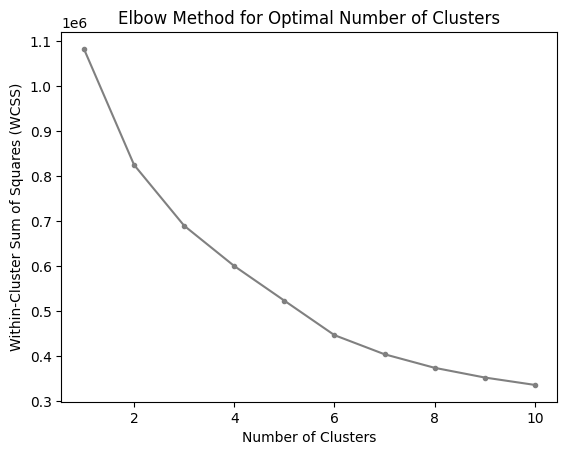

In [13]:
#  Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss, marker='.', color='grey')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

Optimal number of clusters will be 4 as observed from the graph.

In [52]:
# Choose the optimal number of clusters (elbow point)
optimal_clusters = 4

# Customer Segmentation using K-Means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_new['segment_id'] = kmeans.fit_predict(df_scaled)

# Display the DataFrame with the cluster assignments
df_new.head()

,order_item_quantity,sales,benefit_per_order,order_item_discount,order_item_total,order_date,shipping_date,order_duration,segment_id
0,1,327.75,91.250000,13.110000,314.640015,2018-01-31,2018-02-03,3,2
1,1,327.75,-249.089996,16.389999,311.359985,2018-01-13,2018-01-18,5,1
2,1,327.75,-247.779999,18.030001,309.720001,2018-01-13,2018-01-17,4,1
3,1,327.75,22.860001,22.940001,304.809998,2018-01-13,2018-01-16,3,2
4,1,327.75,134.210007,29.500000,298.250000,2018-01-13,2018-01-15,2,2


In [53]:
# Create 'SegmentCat' column based on 'Cluster' values
df_new['segment_category'] = df_new['segment_id'].map({
    0: 'Segment_1',
    1: 'Segment_2',
    2: 'Segment_3',
    3: 'Segment_4'
})

df_new[['segment_id', 'segment_category']].head(10)

,segment_id,segment_category
0,2,Segment_3
1,1,Segment_2
2,1,Segment_2
3,2,Segment_3
4,2,Segment_3
5,2,Segment_3
6,2,Segment_3
7,2,Segment_3
8,2,Segment_3
9,2,Segment_3


### Analyze the customer segmentation


In [54]:
# Number of customers for each category

s1_cus =  (len(df_new[df_new['segment_category']=='Segment_1'])/len(df_new))*100
s2_cus =  (len(df_new[df_new['segment_category']=='Segment_2'])/len(df_new))*100
s3_cus = (len(df_new[df_new['segment_category']=='Segment_3'])/len(df_new))*100
s4_cus = (len(df_new[df_new['segment_category']=='Segment_4'])/len(df_new))*100

print(f'Segment_1: {s1_cus:.1f}%')
print(f'Segment_2: {s2_cus:.1f}%')
print(f'Segment_3: {s3_cus:.1f}%')
print(f'Segment_4: {s4_cus:.1f}%')

Segment_1: 48.4%
Segment_2: 3.5%
Segment_3: 20.8%
Segment_4: 27.3%


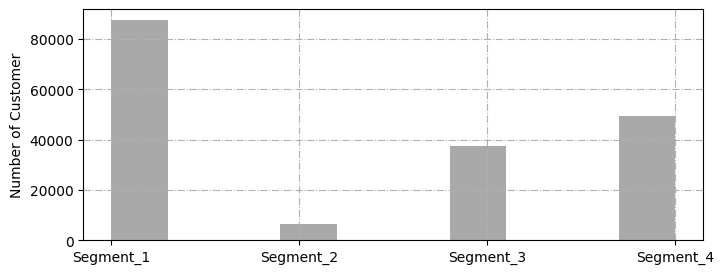

In [55]:
cat = df_new[['segment_category', 'segment_id']]
cat_sorted = cat.sort_values(by=['segment_id'])
plt.figure(figsize=(8,3))
plt.hist(cat_sorted['segment_category'], color='darkgrey')
plt.ylabel('Number of Customer')
plt.grid(True, linestyle='-.')
plt.show()

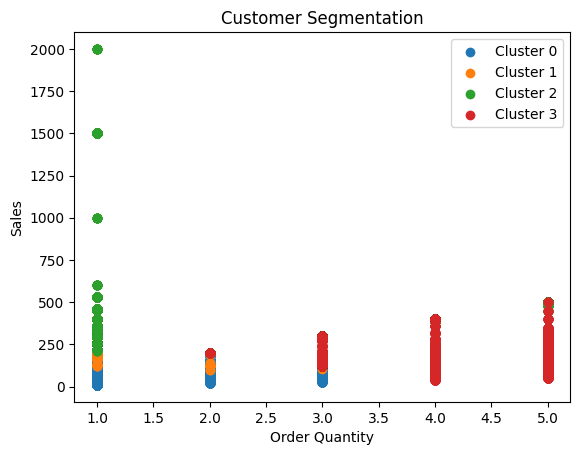

In [56]:
# Visualize the clusters
for cluster in range(optimal_clusters):
    cluster_data = df_new[df_new['segment_id'] == cluster]
    plt.scatter(cluster_data['order_item_quantity'], cluster_data['sales'],
                label=f'Cluster {cluster}')

plt.xlabel('Order Quantity')
plt.ylabel('Sales')
plt.title('Customer Segmentation')
plt.legend()
plt.show()

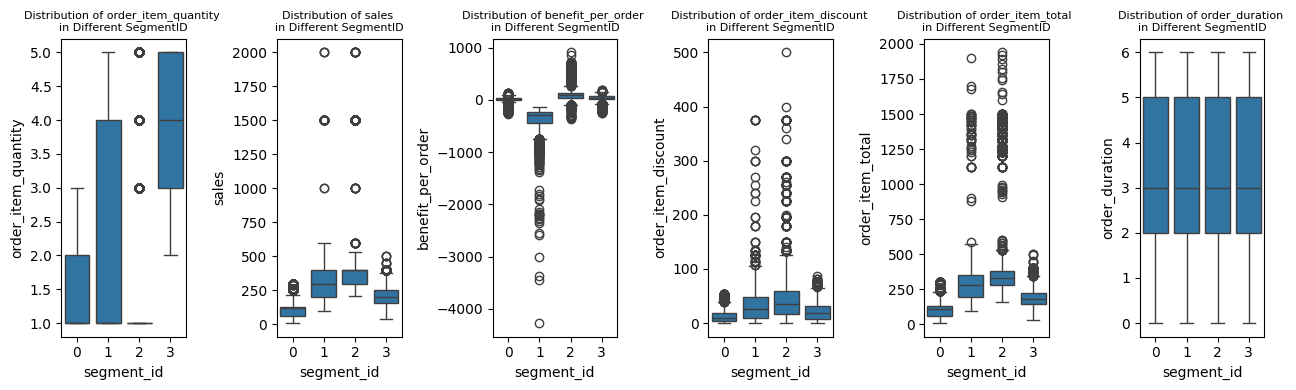

In [57]:
# Visualize the distribution of each feature in different clusters
plt.figure(figsize=(15, 4))
for i, col in enumerate(col, 1):
    plt.subplot(1, 7, i)
    sns.boxplot(x='segment_id', y=col, data=df_new)
    plt.title(f'Distribution of {col} \nin Different SegmentID', fontsize=8)

plt.tight_layout()
plt.show()

### Analyzing each customer segment formed by k-means clustering

**Segment 0:**

* Order Item Quantity: Lower median quantity, which might indicate individual consumers or small orders.
* Sales: Significantly lower sales values.
* Benefit per Order: Narrow range around a slightly positive median benefit, indicating consistent but lower profitability.
* Order Item Discount: Lower discount values, suggesting these customers are less influenced by or receive fewer discounts.
* Order Item Total: Lower total values, aligning with the lower sales and discounts.
* Order Duration: Lower duration, possibly indicating quicker order fulfillment or decision times.
* Interpretation: This segment could represent **'Casual Shoppers'** who purchase less frequently and are less sensitive to discounts, possibly making more spontaneous or need-based purchases.

**Segment 1:**
* Order Item Quantity: Higher variability with a slightly higher median quantity.
* Sales: Higher median sales with some outliers indicating a few very high-value orders.
* Benefit per Order: Wide range, including negative benefits, which may suggest a mix of very profitable and loss-making orders.
* Order Item Discount: Higher discounts on average, suggesting these customers may be more discount-driven.
Order Item Total: Higher total values but less than Segment 2.
* Order Duration: Similar to Segment 0, with a slightly higher duration.
* Interpretation: This segment might be **'Promotion Sensitive Buyers'** who are attracted by discounts and may make larger purchases when incentivized.

**Segment 2:**

* Order Item Quantity: Similar to Segment 1 with a little less variability.
* Sales: Very high sales values with some extreme outliers.
* Benefit per Order: A wide range of benefits, including the most negative and positive values, suggesting a mix of very large but variably profitable orders.
* Order Item Discount: Significant variability in discounts, with some customers getting high discounts.
* Order Item Total: The highest order totals, consistent with the high sales values.
* Order Duration: Median duration similar to Segments 0 and 1, with a wider range indicating more variability in order processing times.
* Interpretation: Could be labeled as **'High-Spending Buyers'**, characterized by high sales and order totals, potentially including both bulk buyers and those purchasing premium items.

**Segment 3:**

* Order Item Quantity: Very high median quantity, suggesting bulk purchases.
* Sales: Lower median sales compared to Segment 1 and especially Segment 2, yet higher than Segment 0.
* Benefit per Order: A narrower range of benefits around a low positive median, indicating more uniformly profitable orders than in Segment 2.
* Order Item Discount: Very low discounts, similar to Segment 0.
* Order Item Total: Despite the high item quantity, the total order value is moderate, suggesting these might be bulk purchases of lower-priced items.
* Order Duration: A bit higher duration than the other segments, suggesting these orders may take longer to process, or customers are willing to wait longer.
* Interpretation: This segment seems to represent **'Bulk Shoppers'**, those who purchase in large quantities but at lower individual item costs, likely driven by need or utility rather than promotion.

Other Observations:
* There appears to be a significant variation within segments, particularly in terms of benefits per order and sales, suggesting diverse buying behaviors within segments.
* The clusters show differentiation primarily in terms of sales, order item quantity, and order item total, which could be key factors for targeted marketing strategies.

### Predictive Modeling

In [58]:
! pip install joblib

In [59]:
# Save the trained model and scaler for future use
import joblib

joblib.dump(kmeans, 'kmeans_model.joblib')
joblib.dump(scaler, 'scaler_model.joblib')

['scaler_model.joblib']

In [60]:
# Predict the category for new data
def predict_category(new_data):
    # Load the trained model and scaler
    kmeans_model = joblib.load('kmeans_model.joblib')
    scaler_model = joblib.load('scaler_model.joblib')

    # Preprocess the new data
    new_data_scaled = scaler_model.transform(new_data)
    
    # Predict the cluster
    cluster_prediction = kmeans_model.predict(new_data_scaled)

    # Map the cluster to the category
    category_prediction = {
        0: 'Casual Shoppers',
        1: 'Promotion Sensitive Buyers',
        2: 'High-Spending Buyers',
        3: 'Bulk Shoppers'
    }.get(cluster_prediction[0], 'Unknown Category')

    return category_prediction

In [62]:

# Predictions
new_data_example = [[1,	327.75,	91.250000,	13.110000, 314.640015, 3]]  # New data for the predictors
predicted_category = predict_category(new_data_example)
print(f"Predicted Category: {predicted_category}")

Predicted Category: High-Spending Buyers
